# Part IV Project Statistical Hypothesis Testing

SUS survey ratings collected from a sample of 20 participants. Collected over a period of 3 weeks. After performance specific tasks, participants were asked to rate the usability of two prototype disaster news apps. The first app was a map interface and the second app was a newsfeed interface.

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_rel, t

In [265]:
map_ratings = pd.read_csv("map.csv", header=None)
newsfeed_ratings = pd.read_csv("newsfeed.csv", header=None)

In [266]:
def compute_SUS(row):
    odd_scores = row.values[::2] - 1
    even_scores = 5 - row.values[1::2]
    return 2.5 * (odd_scores.sum() + even_scores.sum())

map_ratings["SUS_score"] = map_ratings.apply(compute_SUS, axis=1)
newsfeed_ratings["SUS_score"] = newsfeed_ratings.apply(compute_SUS, axis=1)

### Data Cleaning

Removed two outliers from the dataset rows `1` and `13` (index starts from `0`)

Row `1`: map SUS score was significantly lower than the rest of the dataset.

Row `13`: newsfeed SUS score was `100`, meaning perfect percieved usability, significantly greater than the rest of the dataset.

In [267]:
map_outlier = map_ratings.iloc[1]["SUS_score"]
newsfeed_outlier = newsfeed_ratings.iloc[13]["SUS_score"]
print(f"Map SUS score outlier: {map_outlier}")
print(f"Newsfeed SUS score outlier: {newsfeed_outlier}")

map_ratings.drop([1, 13], inplace=True)
newsfeed_ratings.drop([1, 13], inplace=True)

Map SUS score outlier: 50.0
Newsfeed SUS score outlier: 100.0


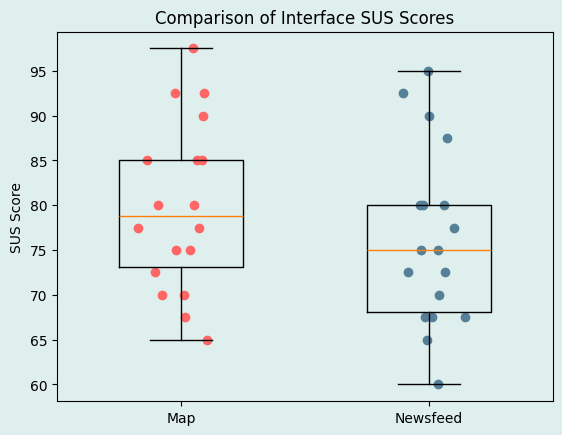

In [268]:
combined_data = [map_ratings['SUS_score'], newsfeed_ratings['SUS_score']]
plt.boxplot(combined_data, widths=0.5)
plt.xticks([1, 2], ["Map", "Newsfeed"])
plt.title("Comparison of Interface SUS Scores")
plt.ylabel("SUS Score")

fig, ax = plt.gcf(), plt.gca()
ax.set_facecolor("#dfefed")
fig.set_facecolor("#dfefed")

scatter_colors = ['#ff6766', '#567f98']
for i, data_point in enumerate(combined_data, 1):
    x_positions = np.random.normal(i, 0.1, len(data_point))
    plt.scatter(x_positions, data_point, c=scatter_colors[i-1])

plt.show()

In [269]:
map_scores = map_ratings['SUS_score'].tolist()
newsfeed_scores = newsfeed_ratings['SUS_score'].tolist()

### Normality Assumption

Test for normality using Shapiro-Wilk test yielded a pvalue of `0.168`. Also, through visual inspection indicates that the data is normally distributed. Therefore, parametric paired t-testing can commence.

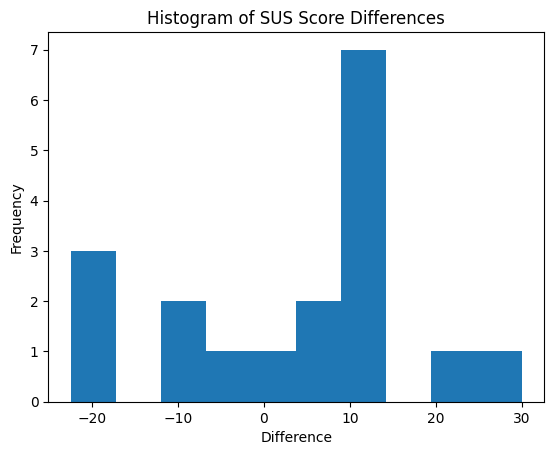

Shapiro-Wilk Test Statistic: 0.9264979362487793
P-value for Normality: 0.1684582680463791


In [270]:
differences = map_ratings['SUS_score'] - newsfeed_ratings['SUS_score']
plt.hist(differences)
plt.title("Histogram of SUS Score Differences")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

result = shapiro(differences)
print(f'Shapiro-Wilk Test Statistic: {result.statistic}')
print(f'P-value for Normality: {result.pvalue}')

### Differences Analysis

Just over half of participants rated the map interface with a higher SUS score than the newsfeed interface. Only `1` participant rating the SUS score equally, which is expected as it is rare for this to occur. This means there is still a significant portion of the population which rated SUS score of the newsfeed interface higher than the map interface.

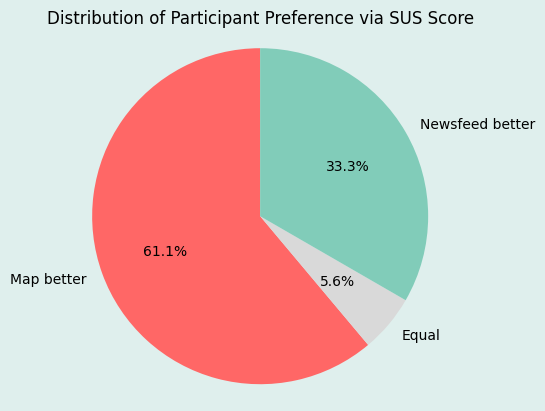

In [271]:
labels = ['Map better', 'Equal', 'Newsfeed better']
sizes = [np.sum(differences > 0), np.sum(differences == 0), np.sum(differences < 0)]
colors = ['#ff6766', '#d9d9d9', '#81ccb9']

fig = plt.gcf()
fig.set_facecolor("#dfefed")

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Distribution of Participant Preference via SUS Score")
plt.axis('equal')
plt.show()

### Hypothesis Testing

Participants are evaluating two different apps using the SUS (System Usability Scale) survey, Each participant provides two scores: one for each app. Therefore, we are dealing with paired or related samples. Paired t-test and confidence interval are used to compare the mean difference between the two apps. The following is our hypotheses:

H0: The null hypothesis is that the mean difference between the two apps is zero. 

H1: The alternative hypothesis is that the mean difference is not zero. 

In [272]:
result = ttest_rel(map_scores, newsfeed_scores)
print(f"T-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

T-statistic: 1.0051214295511794
P-value: 0.3289315932963025


In [273]:
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)
n = len(differences)
se_diff = std_diff / np.sqrt(n)
t_critical = t.ppf(1 - 0.025, df=n-1)

ci_lower = mean_diff - t_critical * se_diff
ci_upper = mean_diff + t_critical * se_diff

print(f"95% Confidence Interval for the difference: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval for the difference: (-3.82, 10.76)


### Discussion

The p-value of 0.32 suggests that the observed difference between the two groups is not statistically significant at the traditional 0.05 alpha level. In other words, assuming there's no true difference between the groups in the population, there's a 32% probability of observing a difference as extreme as (or more extreme than) what was observed in your sample purely due to random chance.

The fact that the 95% CI for the difference includes zero aligns with the non-significant p-value. If the CI includes zero, it indicates that the difference is not statistically significant at the 0.05 level.

Even though the difference isn't statistically significant, the CI still gives an estimate of the possible range of true differences. The range (-3.82, 10.76) means that while the true difference might favor one group, it might also favor the other, or there might be negligible difference.

The combination of the p-value and the CI suggests that while there's no clear statistical evidence of a difference, there's still some uncertainty about the true size and direction of any potential difference. This might be indicative of either the variability in the data or the sample size not being large enough to detect a smaller effect.

Future research directions could include increasing the sample size. It would be beneficial to test the two apps long term and have participants answer the SUS survey at different times to minise any bias.